# Розв'язання задачі лінійного програмування

1. **Оптимальне значення цільової функції**:
   \[ $
   F = x_1 + 3x_2 = 27
   $ \]

2. **Оптимальна точка**:
   \[ $
   x_1 = 0, \, x_2 = 9
   $ \]

3. **Інтерпретація**:
   Функція \( F \) досягає максимального значення \( $ 27 $ \), коли \( $ x_1 = 0 $ \) і \( $ x_2 = 9 $ \), враховуючи всі задані обмеження:
   - \( $ 2x_1 + 5x_2 \geq 20 $ \)
   - \( $ 4x_1 - 3x_2 \leq 24 $ \)
   - \( $ 3x_1 + 4x_2 \leq 36 $ \)
   - \( $ x_1 \geq 0 $ \), \( $ x_2 \geq 0 $ \)


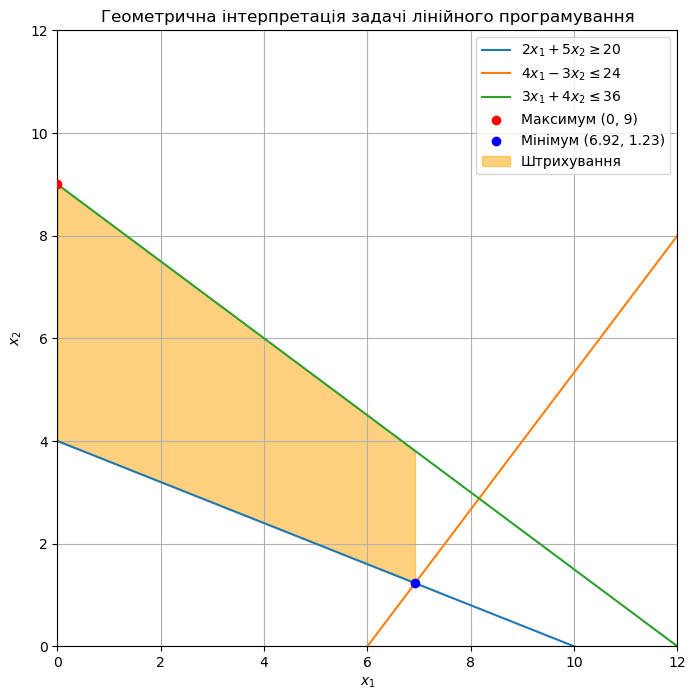

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import symbols, solve

# Задаємо лінії обмежень
x = np.linspace(0, 12, 400)
y1 = (20 - 2 * x) / 5  # 2x1 + 5x2 >= 20
y2 = (4 * x - 24) / 3  # 4x1 - 3x2 <= 24
y3 = (36 - 3 * x) / 4  # 3x1 + 4x2 <= 36

# Обчислення точок перетину
x1, x2 = symbols('x1 x2')

# Рівняння для перетину
intersection_min = solve([2*x1 + 5*x2 - 20, 4*x1 - 3*x2 - 24], (x1, x2))
intersection_min = (round(float(intersection_min[x1]), 2), round(float(intersection_min[x2]), 2))

# Графік
plt.figure(figsize=(8, 8))

# Обмеження
plt.plot(x, y1, label=r"$2x_1 + 5x_2 \geq 20$")
plt.plot(x, y2, label=r"$4x_1 - 3x_2 \leq 24$")
plt.plot(x, y3, label=r"$3x_1 + 4x_2 \leq 36$")



# Оптимальні точки
plt.scatter(0, 9, color='red', zorder=5, label="Максимум (0, 9)")
plt.scatter(*intersection_min, color='blue', zorder=5, label=f"Мінімум {intersection_min}")

# Штрихування області між максимумом і мінімумом
x_fill = np.linspace(0, intersection_min[0], 100)  # x координати між точками
y_fill_max = (20 - 2 * x_fill) / 5  # Лінія для максимуму
y_fill_min = (36 - 3 * x_fill) / 4  # Лінія для мінімуму

plt.fill_between(x_fill, y_fill_max, y_fill_min, color='orange', alpha=0.5, label="Штрихування")

# Підписи осей і графіка
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Геометрична інтерпретація задачі лінійного програмування")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


# Контрольні питання 

### 1. Мета побудови вектора \( \mathbf{C} \)
Вектор \( $ \mathbf{C} $ \) визначає коефіцієнти цільової функції, яку потрібно оптимізувати (максимізувати або мінімізувати). Координати \( $ \mathbf{C} $ \) дорівнюють коефіцієнтам при змінних цільової функції.  
Наприклад, для \( $ F = x_1 + 3x_2 $ \), вектор \( $ \mathbf{C} = [1, 3] $ \).

---

### 2. Визначення опуклої множини
Множина називається **опуклою**, якщо будь-яка лінійна комбінація точок цієї множини теж належить їй. Формально:  
Якщо \( $ x, y \in S $ \) і \( $ \lambda \in [0, 1] $ \), то \( $ \lambda x + (1 - \lambda)y \in S $ \).

---

### 3. Умови існування та відсутності розв’язку задачі лінійного програмування
- **Розв'язок існує**, якщо:
  1. Допустима область обмежена.
  2. Існує точка, яка задовольняє всі обмеження.
- **Розв'язку немає**, якщо:
  1. Допустима область порожня (суперечливі обмеження).
  2. Функція цілі не обмежена в допустимій області (не має екстремуму).

---

### 4. Стандартна та канонічна форми задачі лінійного програмування
- **Канонічна форма**:
  Максимізація функції \( $ F = \mathbf{C}^\top \mathbf{X} $ \) за умов:
  \[ $
  \mathbf{A}\mathbf{X} \leq \mathbf{B}, \quad \mathbf{X} \geq 0.
  $ \]
  Застосовується для спрощення теоретичного аналізу.

- **Стандартна форма**:
  Функція записується в максимізаційному вигляді, а обмеження включають рівності:
  \[ $
  \mathbf{A}\mathbf{X} = \mathbf{B}, \quad \mathbf{X} \geq 0.
  $ \]
  Використовується в практичних обчисленнях та симплекс-методі.
